## TASK 5: Exploratory Data Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
titanic=pd.read_csv("train.csv",encoding="unicode_escape")
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# identifying null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# removing null values
titanic=titanic.dropna(subset="Age")

In [8]:
titanic.shape

(714, 12)

In [9]:
# replacing NaN with unknown
titanic['Cabin']=titanic['Cabin'].fillna("Unknown")

### Barplot

Text(0.5, 1.0, 'Age vs Pclass')

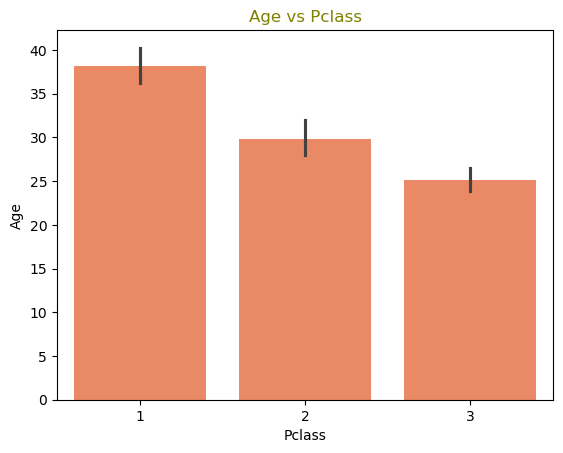

In [10]:
sns.barplot(x="Pclass",y="Age",data=titanic,color="coral")
plt.title("Age vs Pclass",color="olive")

Older, more affluent individuals were more likely to travel in higher classes, while younger passengers were concentrated in lower classes, possibly reflecting socio-economic differences.

Text(0.5, 1.0, 'Passenger class vs Fare split by Gender')

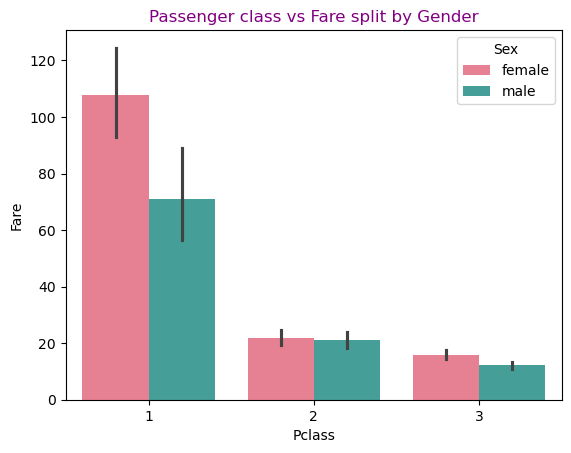

In [11]:
# multivaraite(Pclass,Sex,Fare)
sns.barplot(x="Pclass",y="Fare",hue="Sex",data=titanic,palette="husl") 
plt.title("Passenger class vs Fare split by Gender", color="purple")

People in 1st class paid much higher fares than those in 2nd or 3rd class.
In 1st class, women paid a little more on average than men.
In 2nd and 3rd class, the fares for men and women were almost the same.

### Boxplot (numerical-categorical)

Text(0.5, 1.0, 'Age distribution by Gender and Survival Status')

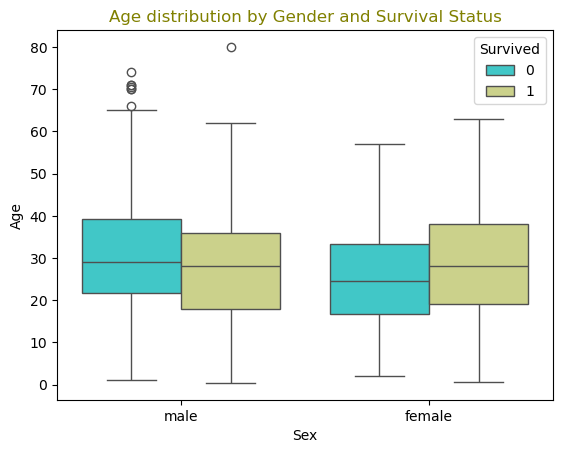

In [12]:
sns.boxplot(x="Sex",y="Age",hue="Survived",data=titanic,palette='rainbow')
plt.title("Age distribution by Gender and Survival Status",color="olive")

Females have much higher survival rate then males. Most passengers were between 20 and 40 years old, regardless of survival status .There are few outliers in males showing that there are few older passengers (around 70-80 years).

### Histplot (numerical-categorical)

Text(0.5, 1.0, 'Age distribution of titanic Passengers by Survival Status')

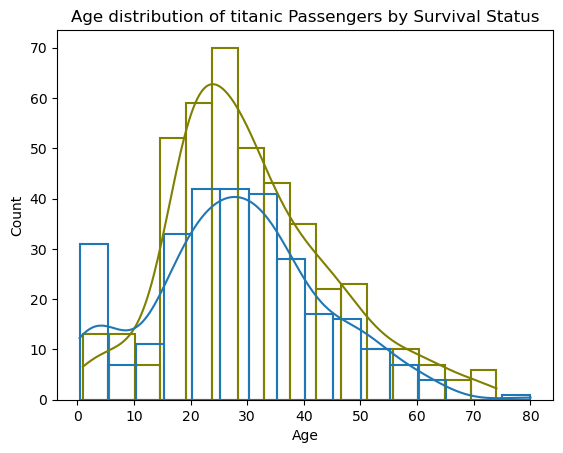

In [13]:
dead=titanic[titanic['Survived']==0]
live=titanic[titanic['Survived']==1]
sns.histplot(x="Age", data= dead,kde=True,fill=False,color="olive")
sns.histplot(x="Age", data= live,kde=True,fill=False)
plt.title("Age distribution of titanic Passengers by Survival Status")

There are only few children between the age of 0-5 years . Chances of survival is more around the age of 20-30 years .Passengers around the age of 70 years have the least survival rate. Overall death rate is more as compared to the survival rate.

### Kdeplot

<Axes: xlabel='Age', ylabel='Density'>

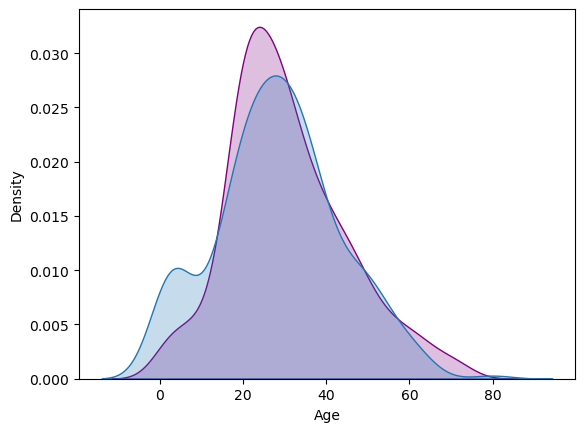

In [17]:
# if we want only curve and shaded region
dead=titanic[titanic['Survived']==0]
live=titanic[titanic['Survived']==1]
sns.kdeplot(x="Age", data= dead,fill=True,color="purple")
sns.kdeplot(x="Age", data= live,fill=True)

Most of the passengers are between the age of 20-30. The survival rate is more around the age of 0-10 showing priority had been given to the children first.

### Heatmap

In [18]:
pd.crosstab(titanic["Pclass"],titanic["Survived"])

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


<Axes: xlabel='Survived', ylabel='Pclass'>

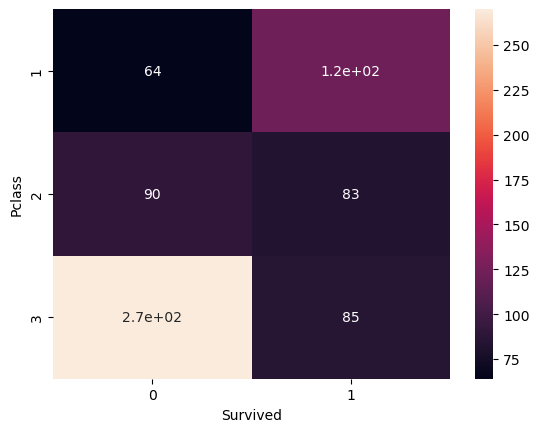

In [47]:
sns.heatmap(pd.crosstab(titanic["Pclass"],titanic["Survived"]),annot=True)

### Barplot

In [19]:
titanic.groupby('Pclass')['Survived'].mean()*100

Pclass
1    65.591398
2    47.976879
3    23.943662
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

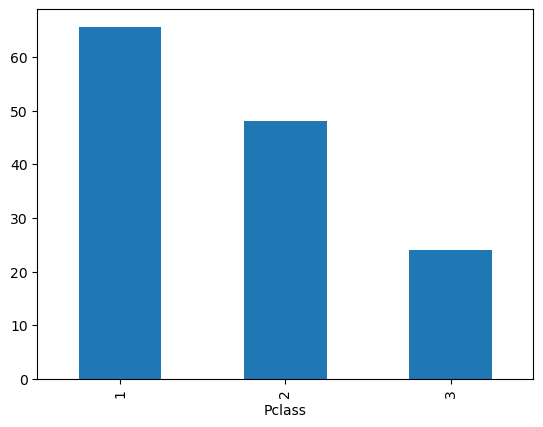

In [20]:
(titanic.groupby('Pclass')['Survived'].mean()*100).plot(kind="bar")

Survival rate is more in Pclass 1 as compared to two other classes.

### Clustermap (categorical-categorical)


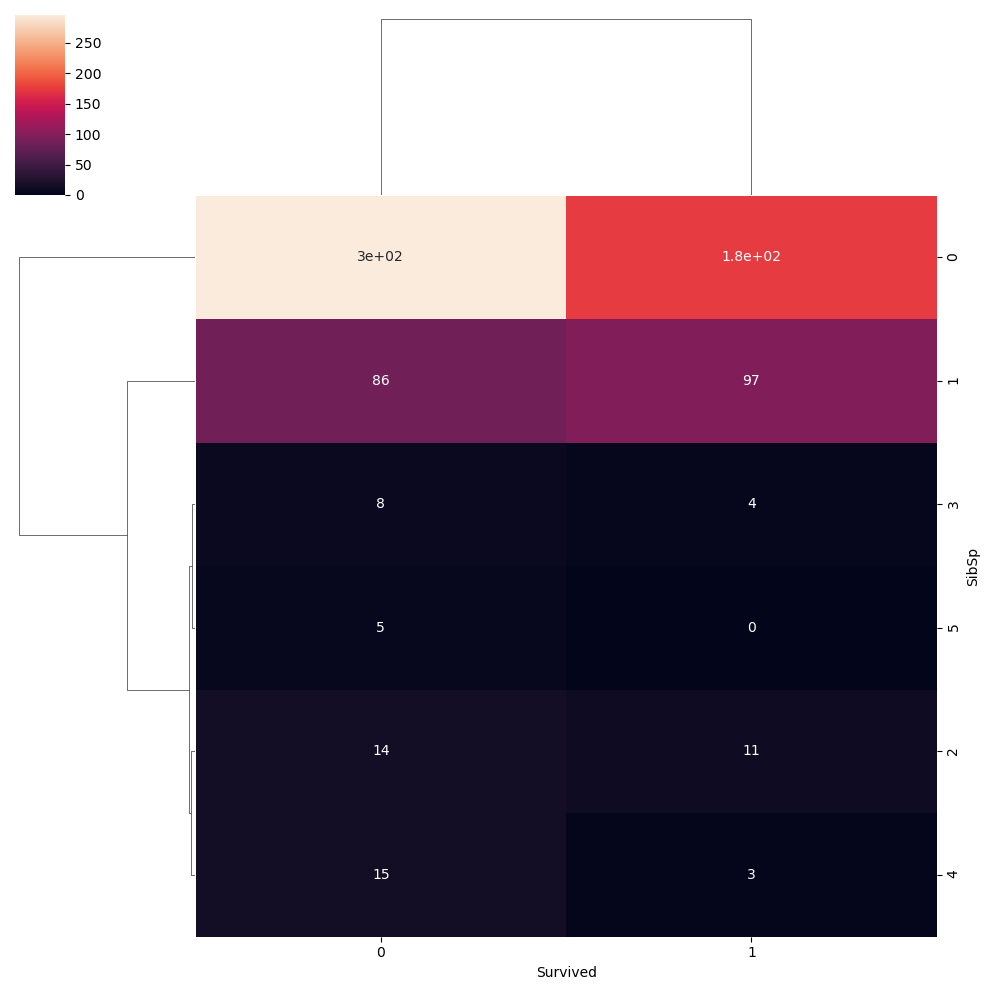

In [48]:
sns.clustermap(pd.crosstab(titanic["SibSp"],titanic['Survived']),annot=True)

### Pairplot

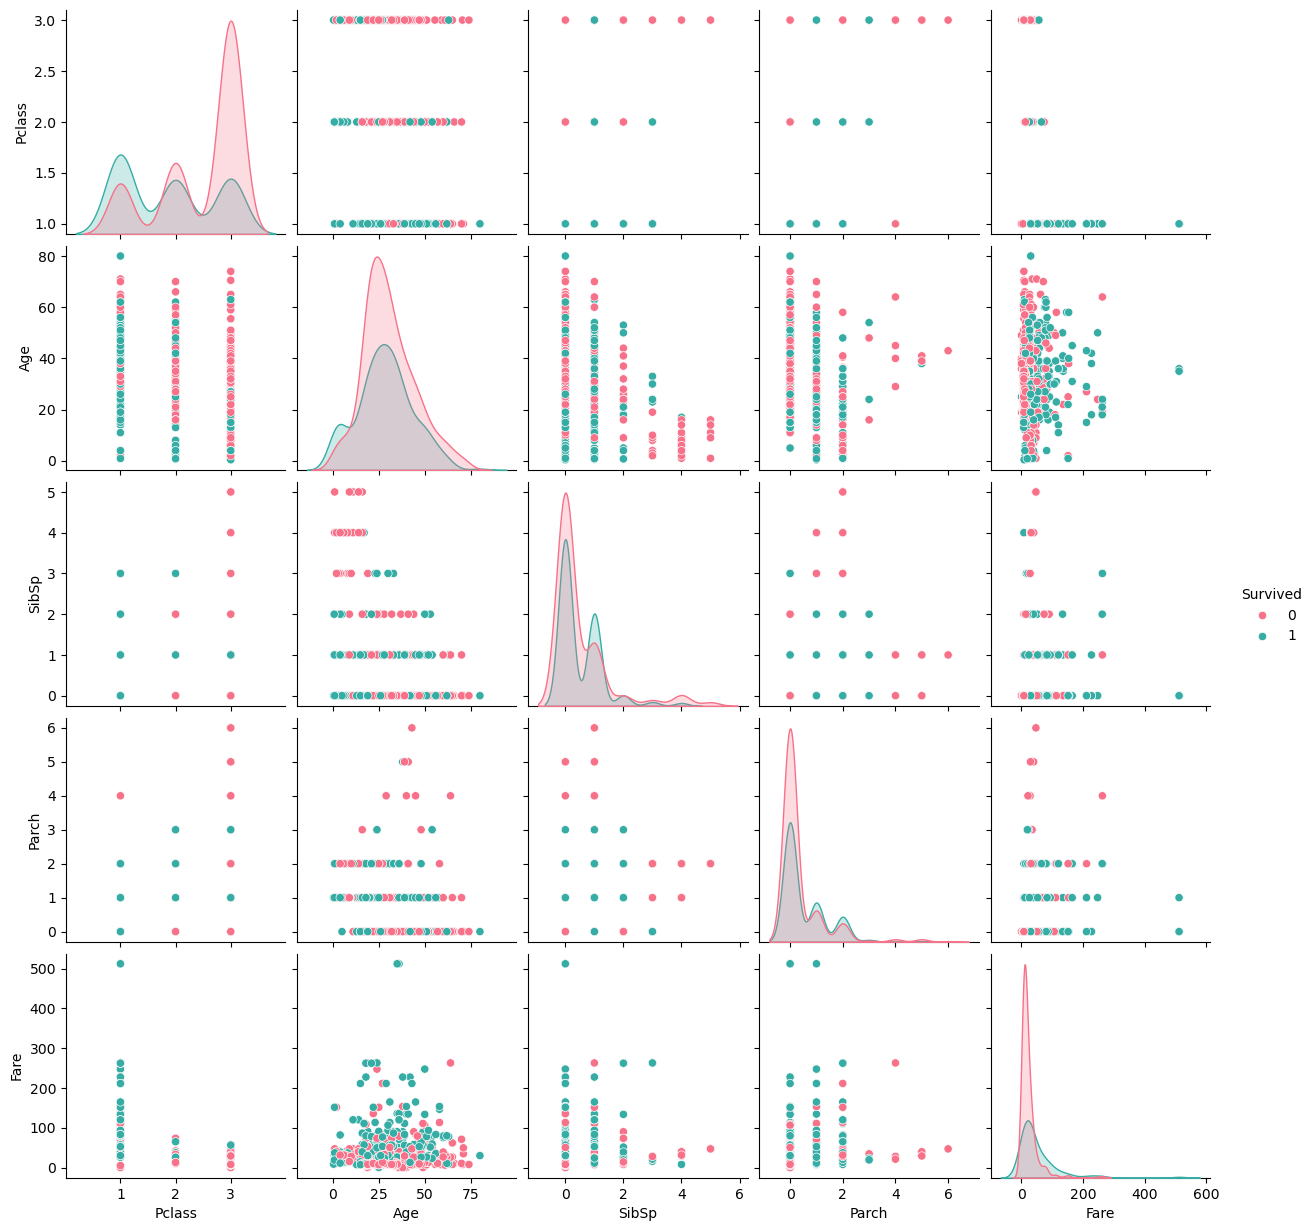

In [35]:
cols=["Survived",'Pclass','Age','SibSp','Parch','Fare']
sns.pairplot(titanic[cols],hue="Survived",diag_kind="kde",palette="husl")
plt.show()

### Scatterplot

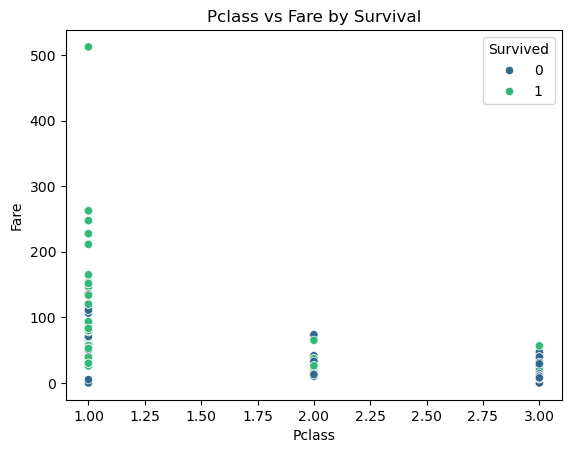

In [36]:
sns.scatterplot(data=titanic,x="Pclass",y='Fare',hue='Survived',palette="viridis")
plt.title('Pclass vs Fare by Survival')
plt.show()

Higher fares are mostly paid by 1st class passengers, and many of them survived.Lower fares are linked to the 3rd class passengers , and survival rate seems much lower . 2nd class fares are in between and have a mixed survival rate. Overall, passengers who paid higher fare had a better chance of survival.